In [ ]:
%pip install numpy pandas seaborn matplotlib ydata-profiling scikit-learn

In [284]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [215]:
df=pd.read_csv("Sport car price.csv")

In [216]:
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [217]:
df.describe(include = "all")

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
count,1007,1007,1007.000000,997,1007,1004,1007,1007
unique,38,176,NaN,45,124,93,43,367
top,Porsche,GT,NaN,4,503,590,3.5,"500,000"
freq,88,55,NaN,219,45,71,153,34
mean,NaN,NaN,2021.201589,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,2.019802,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1965.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2022.000000,NaN,NaN,NaN,NaN,NaN


In [218]:
df.shape

(1007, 8)

In [219]:
display(df)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Year'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Year'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['Year', 'count()', None], **{})
chart

In [220]:
df.isna().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

In [221]:
profile= ProfileReport(df, title="Report")

In [222]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [223]:
df = df.drop_duplicates()

In [224]:
l = df.duplicated()
d=[]
for i in l:
  if i==True:
    d.append(i)
d.count(True)


0

In [61]:
# df["Car Make"] = df['Car_Make_codes']
# df['Car Model'] = df['Car_Model_code']

In [225]:
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [226]:
# Fill missing values for numerical columns with the median
# Fill missing values for categorical columns with the most common value (mode)
categorical_columns = ['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [227]:
print(df.isna().sum())

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64


In [232]:
def price_fix(df):
    # Remove commas and convert 'Price (in USD)' to float
    df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '', regex=True).astype(float)

    return df

In [233]:
fixed_df = price_fix(df)

In [235]:
display(df['Price (in USD)'])

0        101200.0
1        274390.0
2        333750.0
3        142700.0
4        298000.0
          ...    
999       30090.0
1002    3000000.0
1003    2000000.0
1005    2600000.0
1006    2400000.0
Name: Price (in USD), Length: 719, dtype: float64

In [249]:
max(df["Price (in USD)"])

5200000.0

In [247]:
df_heatmap = fixed_df.pivot_table(index='Engine Size (L)', columns=["Car Make", "Car Model"], values="Price (in USD)")

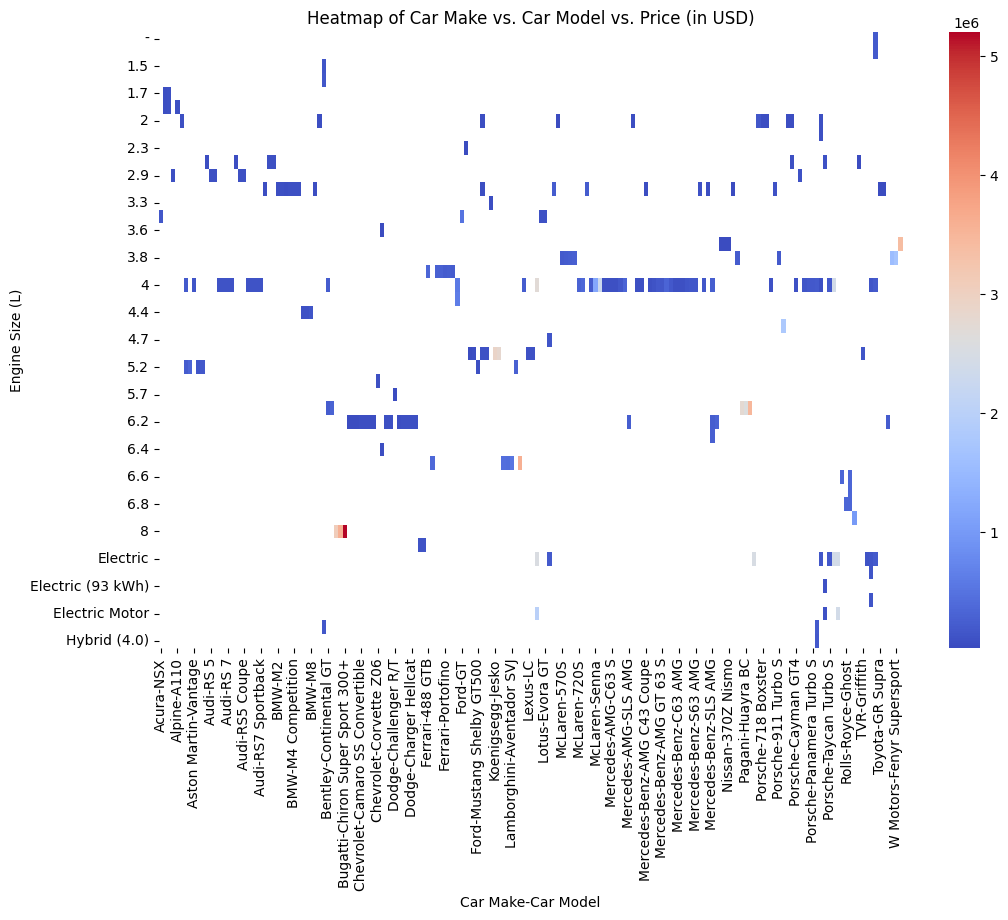

In [251]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap, cmap='coolwarm')
plt.title('Heatmap of Car Make vs. Car Model vs. Price (in USD)')
plt.show()

In [274]:
df._get_numeric_data().columns

Index(['Year', 'Price (in USD)'], dtype='object')

In [279]:
n_df=df

In [280]:
n_df.columns

Index(['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower',
       'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)'],
      dtype='object')

In [285]:
# n_df['Car Make'] = n_df['Car Make'].astype('category')
# n_df['Car_Make_codes'] = n_df['Car Make'].cat.codes
# n_df['Car Model'] = n_df['Car Model'].astype('category')
# n_df['Car_Model_code'] = n_df['Car Model'].cat.codes
columns_to_encode = ['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode each column
for column in columns_to_encode:
    n_df[column] = label_encoder.fit_transform(n_df[column])
display(n_df)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,28,18,7,11,41,28,25,101200.0
1,16,98,6,24,92,44,13,274390.0
2,11,5,7,17,99,68,15,333750.0
3,5,130,7,24,72,39,17,142700.0
4,21,15,6,18,104,69,12,298000.0
...,...,...,...,...,...,...,...,...
999,24,1,6,15,34,21,36,30090.0
1002,15,99,7,23,12,7,10,3000000.0
1003,18,76,6,42,22,9,5,2000000.0
1005,25,95,6,27,114,88,15,2600000.0


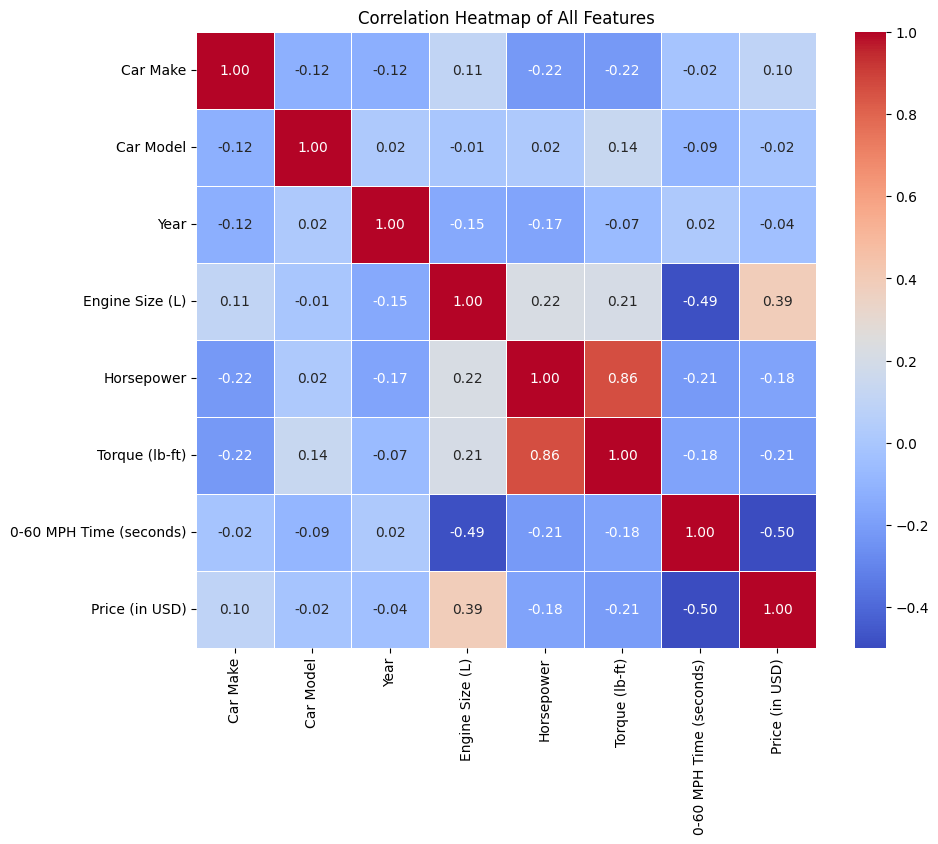

In [286]:
# Create a heatmap for the correlation of all features
plt.figure(figsize=(10, 8))
sns.heatmap(n_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

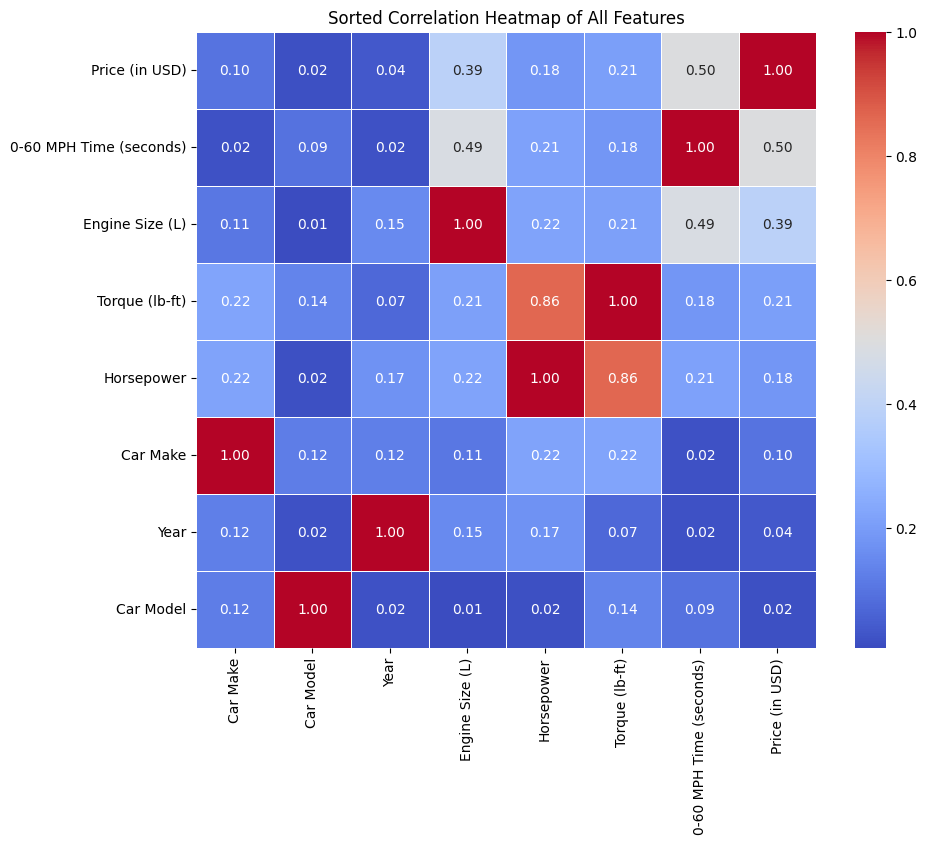

In [290]:
# Calculate the correlation matrix
correlation_matrix = n_df.corr()

# Sort the correlation matrix to highlight highest correlations
sorted_corr_matrix = correlation_matrix.abs().sort_values(by='Price (in USD)', ascending=False)

# Create a heatmap for the sorted correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Sorted Correlation Heatmap of All Features')
plt.show()

In [291]:
sorted_corr_matrix

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
Price (in USD),0.097231,0.016812,0.036988,0.388908,0.182047,0.207328,0.498237,1.000000
0-60 MPH Time (seconds),0.018242,0.093491,0.018121,0.485626,0.212542,0.181439,1.000000,0.498237
Engine Size (L),0.105207,0.006250,0.150241,1.000000,0.219316,0.208552,0.485626,0.388908
Torque (lb-ft),0.223052,0.136255,0.069537,0.208552,0.861162,1.000000,0.181439,0.207328
Horsepower,0.218263,0.017003,0.172055,0.219316,1.000000,0.861162,0.212542,0.182047
Car Make,1.000000,0.120418,0.124270,0.105207,0.218263,0.223052,0.018242,0.097231
Year,0.124270,0.018730,1.000000,0.150241,0.172055,0.069537,0.018121,0.036988
Car Model,0.120418,1.000000,0.018730,0.006250,0.017003,0.136255,0.093491,0.016812


In [292]:
highest=["0-60 MPH Time (seconds)", "Engine Size (L)", "Torque (lb-ft)", "Horsepower"]

In [294]:
n_df.describe()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,7.190000e+02
mean,15.930459,86.136300,6.264256,20.308762,67.688456,49.472879,20.470097,3.900549e+05
std,9.138712,48.861647,0.850849,8.712481,30.252103,23.277460,8.191400,7.751617e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+04
25%,8.000000,52.000000,6.000000,15.000000,47.000000,30.000000,15.000000,7.010000e+04
50%,16.000000,80.000000,6.000000,18.000000,67.000000,47.000000,20.000000,1.341500e+05
75%,23.000000,124.500000,7.000000,28.000000,92.000000,70.000000,25.000000,2.250000e+05
max,37.000000,175.000000,8.000000,44.000000,123.000000,92.000000,42.000000,5.200000e+06


<Axes: >

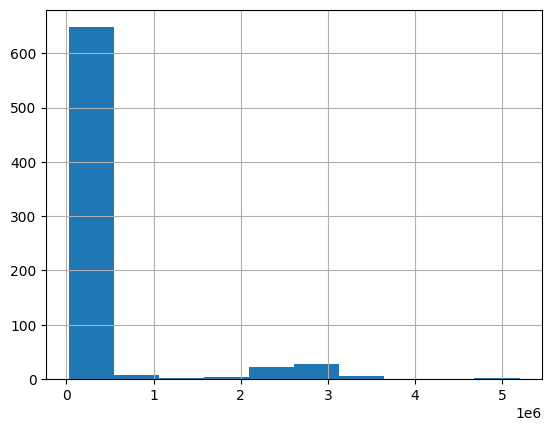

In [297]:
df["Price (in USD)"].hist()